# Predicting Telecom Customer Churn

## Project Group #5 - Milestone 2

### Dataset Description 


Telecom companies collect enormous amount of customer details every day and whenever a customer subscribes to service. These customer details can be grouped into following six categories.

    1) Customer care service details.

    2) Customer demography and personal details.

    3) Customer credit score.

    4) Bill and payment details.

    5) Customer usage pattern.

    6) Customer value added services.
    

In [10]:
#Load Library

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn




In [11]:
#Load data into dataframe and split into 3 types

# Load the dataset (replace with the actual file path)
file_path = "./data/cell2celltrain.csv"
train_churn_df = pd.read_csv(file_path)


#Display data shape
print("Train Data size : ")
print(train_churn_df.shape)

#Display sample data
print("\n\nChurn Data sample")
display(train_churn_df.head())

# Display basic information about the dataset
print("\n\nData Information:")
print(train_churn_df.info())





Train Data size : 
(51047, 58)


Churn Data sample


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes




Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls         

In [31]:


# Separate into 3 types of dataframes: categorical, quantitative-discrete, and quantitative-continuous

categorical_features = ["CustomerID", "Churn", "RespondsToMailOffers", "OptOutMailings", "MadeCallToRetentionTeam", "ServiceArea",
                        "Handsets", "HandsetModels", "ChildrenInHH", "HandsetRefurbished", "HandsetWebCapable", "TruckOwner",
                        "RVOwner", "Homeownership", "BuysViaMailOrder", "NonUSTravel", "OwnsComputer", "HasCreditCard",
                        "NewCellphoneUser", "NotNewCellphoneUser", "ReferralsMadeBySubscriber", "IncomeGroup", "OwnsMotorcycle",
                        "PrizmCode", "Occupation", "MaritalStatus"]

quan_discrete_features = ["AdjustmentsToCreditRating", "CreditRating", "MonthsInService", "UniqueSubs", "ActiveSubs",
                          "CurrentEquipmentDays", "AgeHH1", "AgeHH2", "HandsetPrice", "RetentionCalls", "RetentionOffersAccepted"]

quan_continuous_features = ["MonthlyRevenue", "TotalRecurringCharge", "PercChangeRevenues", "BlockedCalls", "CustomerCareCalls",
                            "DroppedBlockedCalls", "MonthlyMinutes", "OverageMinutes", "RoamingCalls", "PercChangeMinutes",
                            "DroppedCalls", "UnansweredCalls", "ReceivedCalls", "OutboundCalls", "InboundCalls", "PeakCallsInOut",
                            "OffPeakCallsInOut", "DirectorAssistedCalls", "ThreewayCalls", "CallForwardingCalls", "CallWaitingCalls"]

# Split the dataframe based on the feature lists
categorical_df = train_churn_df[categorical_features]
quan_discr_df = train_churn_df[quan_discrete_features]
quan_cont_df = train_churn_df[quan_continuous_features]

# Display column names and samples for each data type
print("\nCategorical Columns:", categorical_df.columns.tolist())
print(categorical_df.head())

print("\nQuantitative-Discrete Columns:", quan_discr_df.columns.tolist())
print(quan_discr_df.head())

print("\nQuantitative-Continuous Columns:", quan_cont_df.columns.tolist())
print(quan_cont_df.head())



Categorical Columns: ['CustomerID', 'Churn', 'RespondsToMailOffers', 'OptOutMailings', 'MadeCallToRetentionTeam', 'ServiceArea', 'Handsets', 'HandsetModels', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'PrizmCode', 'Occupation', 'MaritalStatus']
   CustomerID Churn RespondsToMailOffers OptOutMailings  \
0     3000002   Yes                  Yes             No   
1     3000010   Yes                  Yes             No   
2     3000014    No                   No             No   
3     3000022    No                  Yes             No   
4     3000026   Yes                  Yes             No   

  MadeCallToRetentionTeam ServiceArea  Handsets  HandsetModels ChildrenInHH  \
0                     Yes   SEAPOR503       2.0            2.0           No   
1         

# Check Missing data

In [12]:
#Explore Missingness using missingno

print(f'Columns with at least one nan value: {train_churn_df.isna().any(axis=0).sum()}')
print(f'Rows  with at least one nan value: {train_churn_df.isna().any(axis=1).sum()}')


Columns with at least one nan value: 14
Rows  with at least one nan value: 1295


This chart is a **missing value bar plot**, likely generated with the `msno` library in Python, and it shows the count of non-missing (non-null) values for each column in the dataset. Each row represents a column, with the length of the bar corresponding to the number of non-missing values in that column.

### Key Observations:
1. **Complete Data**: Most columns have complete data, with the bar extending to the maximum count of 50,000, indicating no missing values.
2. **Missing Data**: A few columns, such as `ChildrenInHH` and `AgeHH2`, have slightly shorter bars, indicating some missing values (e.g., around 49,109 non-missing values for `ChildrenInHH`).
3. **Scale**: The x-axis shows the count of non-missing values from 0 to 51,047, allowing easy identification of columns with partial data.

### Significance:
This plot helps quickly identify columns with missing data, which is useful for deciding how to handle them in preprocessing, such as imputing or dropping columns based on the extent of missingness.

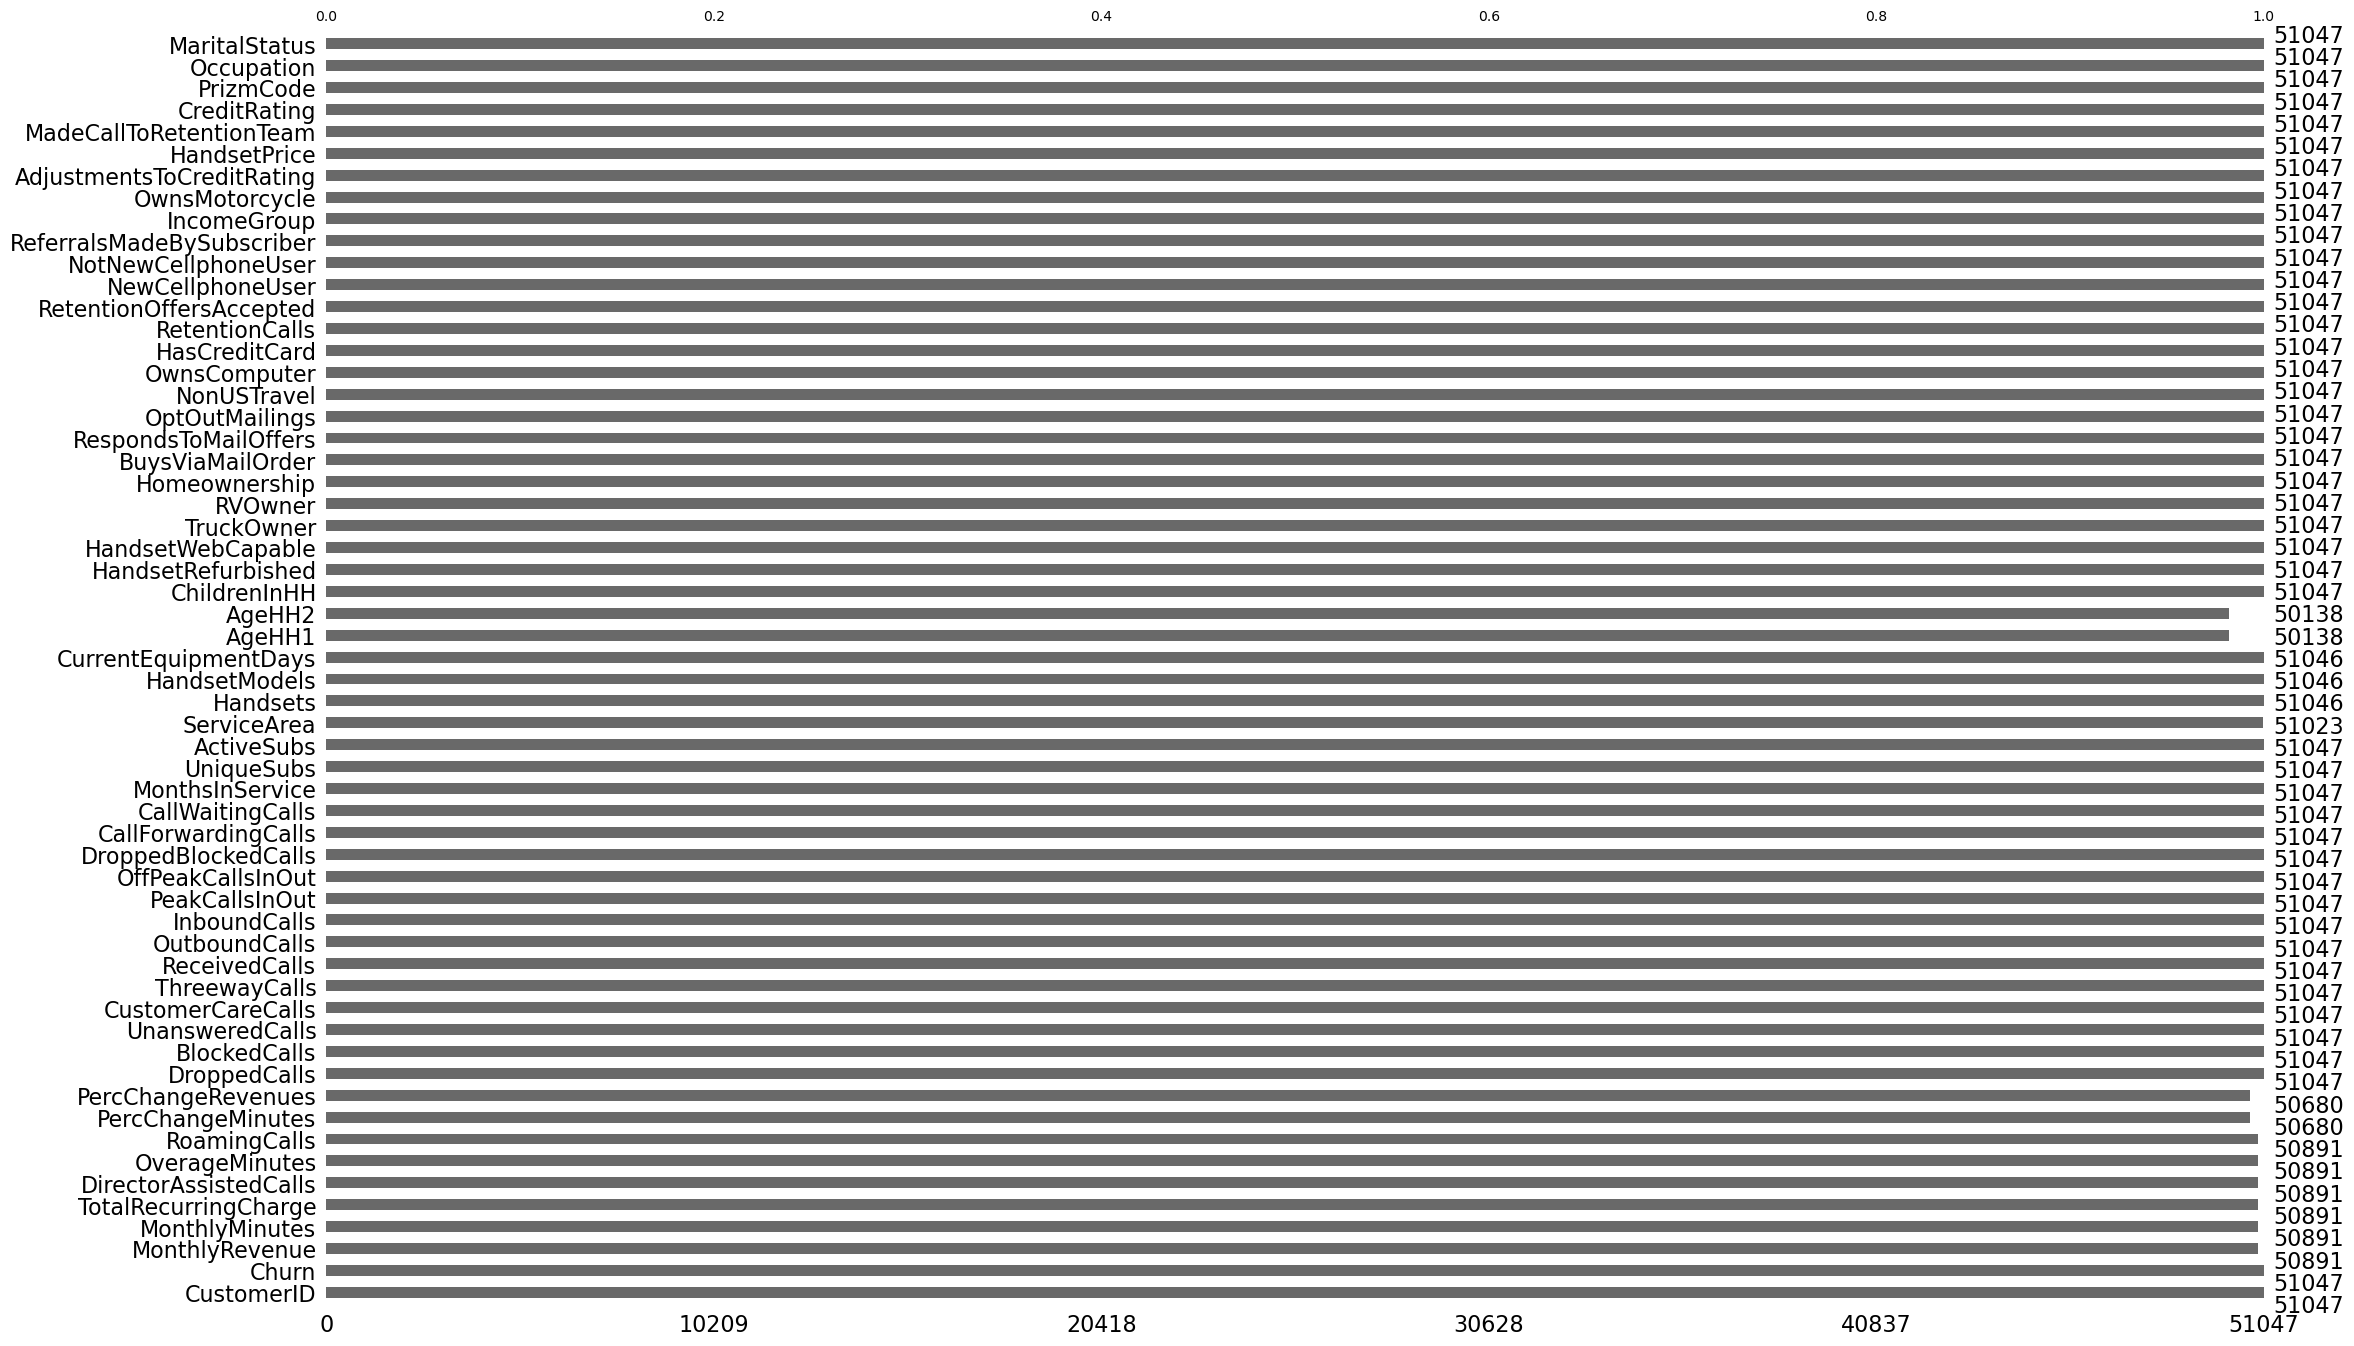

In [25]:
#Display missingno library

msno.bar(train_churn_df.sample(51047));


This **msno heatmap** shows correlations between missing values across columns, highlighting patterns in missing data. 

1. **Dark Blue (1.0)**: Indicates a perfect correlation (e.g., `MonthlyRevenue` and `MonthlyMinutes` always have missing data together).
2. **Lighter Blue (0.7)**: Shows a moderate correlation, meaning these columns (e.g., `PercChangeMinutes` and `PercChangeRevenues`) often have missing values together.
3. **White**: Represents no correlation, suggesting these columns have independent missing patterns.

This insight helps guide imputation strategies and data cleaning by identifying relationships in missingness.

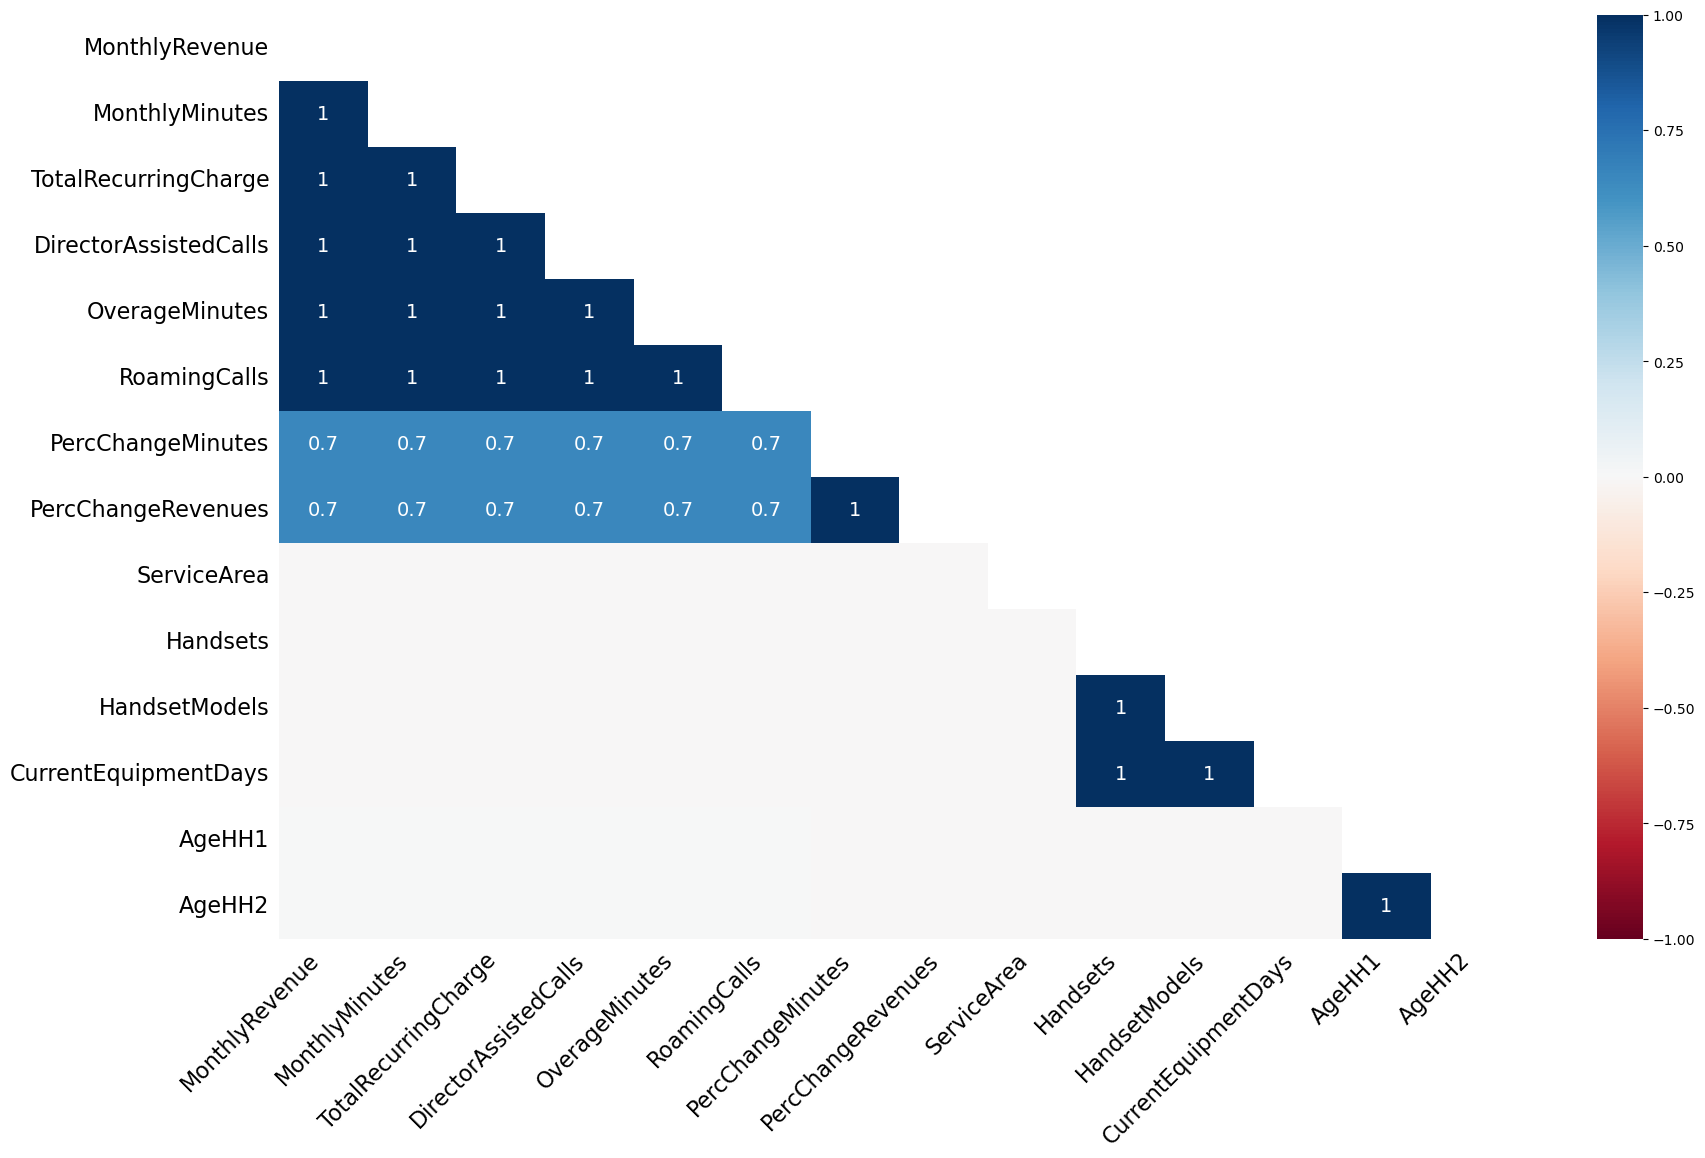

In [14]:
#Missingno heatmap

msno.heatmap(train_churn_df.sample(50000));

This dendrogram shows hierarchical clustering of dataset columns based on missing data patterns. Features closer together, like `AgeHH1` and `AgeHH2`, have similar missingness patterns, while those further apart are less related. The horizontal axis represents the "distance" or dissimilarity between clusters. This visualization helps identify groups of features with similar missing data patterns,
aiding in imputation or feature selection strategies.

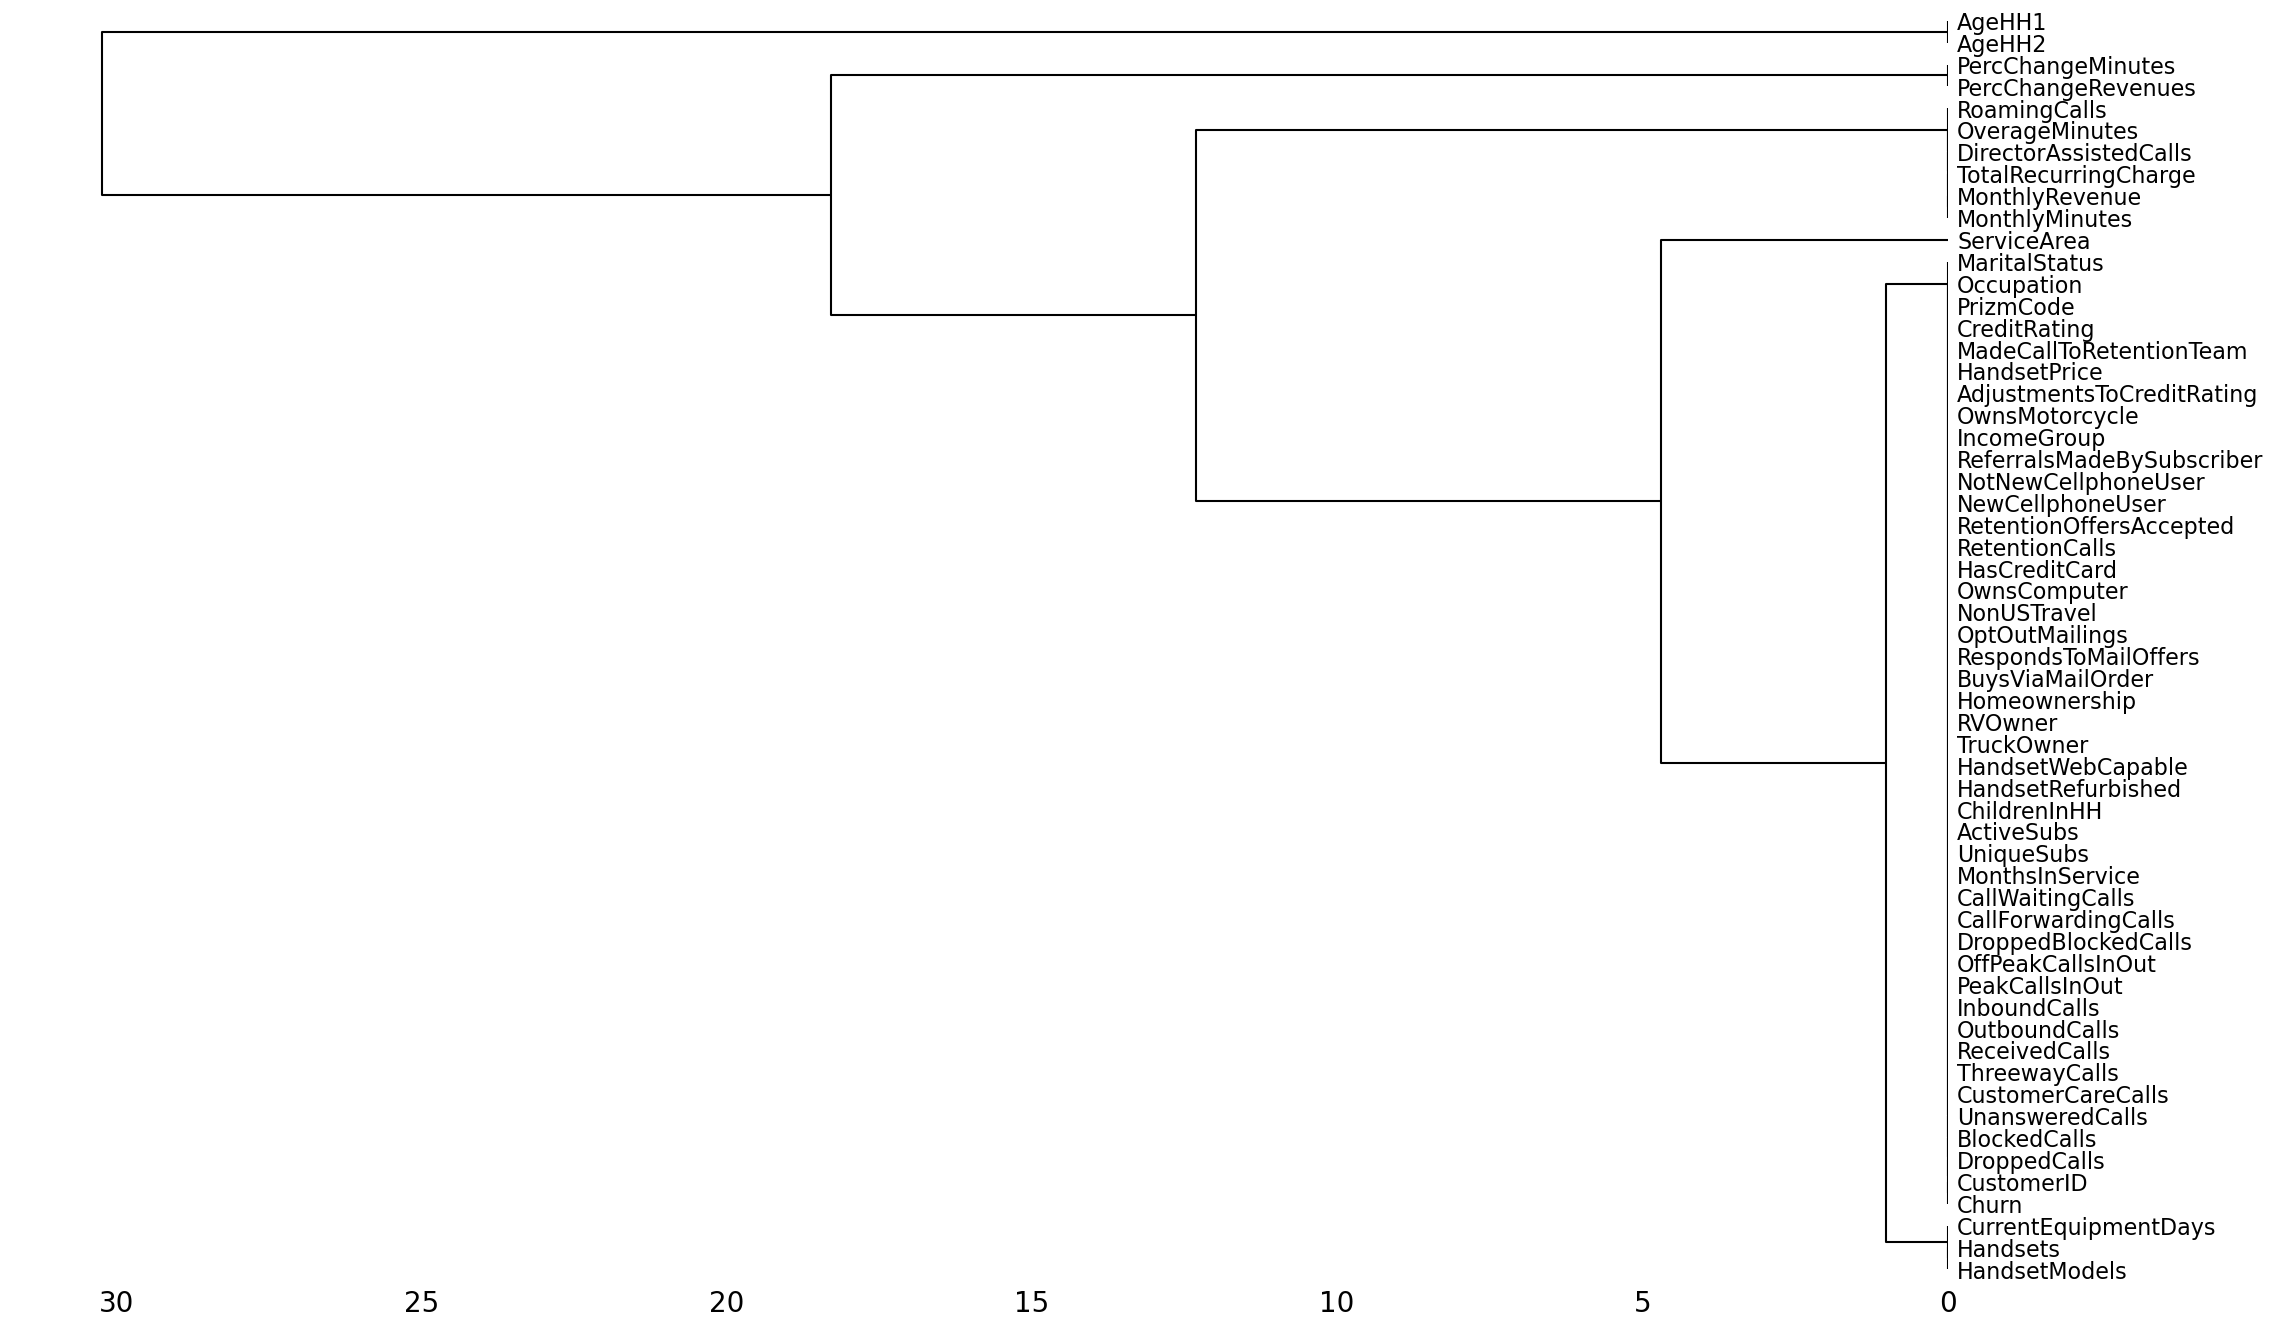

In [15]:
#Dendrogram

msno.dendrogram(train_churn_df.sample(50000));


# Data Imbalance

 
Data imbalance occurs when one class (e.g., Churn) is significantly underrepresented compared to the other (e.g., Non-Churn). This imbalance can lead the model to become biased toward the majority class, as it may learn to predict the majority class more often to achieve higher accuracy. As a result, the model may fail to correctly identify instances of the minority class, leading to poor performance in identifying Churn cases. This can be particularly problematic in scenarios where identifying the minority class is critical, as in churn prediction, where accurate churn detection is essential for retention strategies. Additionally, metrics like accuracy can be misleading in imbalanced datasets, as high accuracy might simply reflect the model's tendency to predict the majority class.

#### How to balance Data ?

We will use Imbalanced-Learn Python module to help resampling the data to increase the data volume. From our observation, non-churn data is much smaller than churn data.
One way to fight imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with the replacement of the currently available samples. The *** RandomOverSampler *** offers such a scheme.



Class distribution in the target variable:
Churn
No     0.711815
Yes    0.288185
Name: proportion, dtype: float64


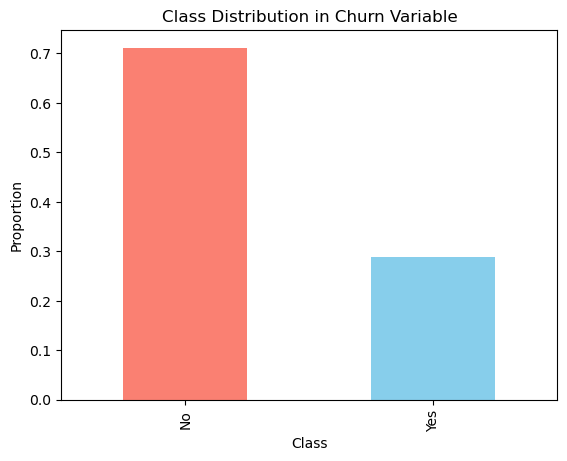

In [22]:

#Display the current Churn vs non-churn distribution

# Load the data
#data = pd.read_csv('/mnt/data/cell2celltrain.csv')

# Check for class imbalance in the target variable (assuming the target column is named 'AHD')
# Replace 'AHD' with the actual target column name if different
target_column = 'Churn'  # Replace with actual target column name
class_counts = train_churn_df[target_column].value_counts(normalize=True)

# Display class distribution
print("Class distribution in the target variable:")
print(class_counts)

# Plot the class distribution


class_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.title("Class Distribution in Churn Variable")
plt.show()


Class distribution after oversampling:
Churn
Yes    0.5
No     0.5
Name: proportion, dtype: float64


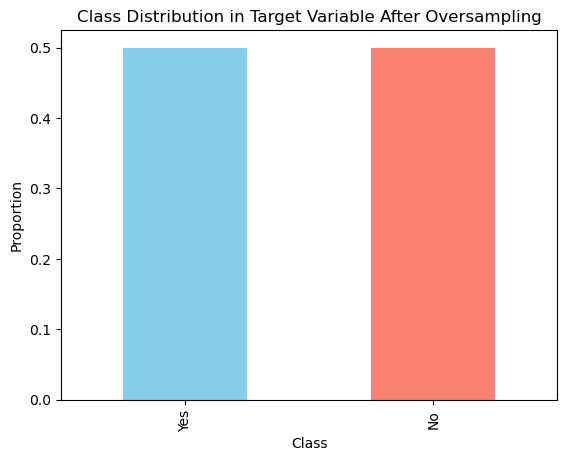

In [21]:
from imblearn.over_sampling import RandomOverSampler

# Define the target column and features
X = train_churn_df.drop(columns=['Churn'])  # Features (drop target column)
y = train_churn_df['Churn']                 # Target column

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after oversampling:")
print(y_resampled.value_counts(normalize=True))

# Plot the new class distribution
y_resampled.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.title("Class Distribution in Target Variable After Oversampling")
plt.show()


# Data Scaling

To assess whether any features in the churn dataset require scaling, it is essential to identify numerical features with varying ranges. Features with large ranges (e.g., MonthlyRevenue, MonthlyMinutes) often need scaling, particularly when employing models sensitive to feature magnitudes, such as logistic regression or K-nearest neighbors.

To perform a data scaling check on the quan_continuous_features, you can examine the range (minimum and maximum values) and the standard deviation of each feature. Large ranges and high variability indicate that scaling may be necessary. 

In [29]:

# Display summary statistics (range and standard deviation) for quantitative continuous features
# Assuming train_churn_df is your DataFrame

# Check for scaling requirements on quantitative continuous features
quan_cont_df = train_churn_df[quan_continuous_features]

# Display the range and standard deviation of each feature
scaling_check = quan_cont_df.describe().T[['min', 'max', 'std']]
scaling_check['range'] = scaling_check['max'] - scaling_check['min']

print("Scaling Check for Quantitative Continuous Features:")
print(scaling_check)


Scaling Check for Quantitative Continuous Features:
                           min      max         std    range
MonthlyRevenue           -6.17  1223.38   44.507336  1229.55
TotalRecurringCharge    -11.00   400.00   23.848871   411.00
PercChangeRevenues    -1107.70  2483.50   39.574915  3591.20
BlockedCalls              0.00   384.30   10.946905   384.30
CustomerCareCalls         0.00   327.30    5.096138   327.30
DroppedBlockedCalls       0.00   411.70   15.555284   411.70
MonthlyMinutes            0.00  7359.00  529.871063  7359.00
OverageMinutes            0.00  4321.00   96.588076  4321.00
RoamingCalls              0.00  1112.40    9.818294  1112.40
PercChangeMinutes     -3875.00  5192.00  257.514772  9067.00
DroppedCalls              0.00   221.70    9.043955   221.70
UnansweredCalls           0.00   848.70   38.876194   848.70
ReceivedCalls             0.00  2692.40  166.485896  2692.40
OutboundCalls             0.00   644.30   35.209147   644.30
InboundCalls              0.00   

Based on the provided scaling check, the following features would benefit from scaling due to their large ranges or high standard deviations:

1. **MonthlyRevenue**: Range of 1229.55 and a relatively high standard deviation of 44.51.
2. **TotalRecurringCharge**: Range of 411.00, with notable standard deviation.
3. **PercChangeRevenues**: Very large range of 3591.20.
4. **BlockedCalls**: Range of 384.30.
5. **CustomerCareCalls**: Range of 327.30.
6. **DroppedBlockedCalls**: Range of 411.70.
7. **MonthlyMinutes**: Very large range of 7359.00 and high standard deviation (529.87).
8. **OverageMinutes**: Range of 4321.00.
9. **RoamingCalls**: Range of 1112.40.
10. **PercChangeMinutes**: Extremely large range of 9067.00 and high standard deviation (257.51).
11. **UnansweredCalls**: Range of 848.70.
12. **ReceivedCalls**: Range of 2692.40 and high standard deviation.
13. **OutboundCalls**: Range of 644.30.
14. **InboundCalls**: Range of 519.30.
15. **PeakCallsInOut**: Range of 2090.70.
16. **OffPeakCallsInOut**: Range of 1474.70.

### Suggested Approach:
Use **StandardScaler** or **MinMaxScaler** to scale these features. Scaling will normalize the range, ensuring that features with larger values do not dominate models that are sensitive to feature magnitude. 

**Note**: Features with smaller ranges and standard deviations (e.g., `ThreewayCalls`, `CallForwardingCalls`) may not need scaling as urgently.